In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import random as rd

import matplotlib.pyplot as plt 


In [6]:
Age = RandomListOfIntegers = [rd.randint(10, 80) for iter in range(100)]
#Hours spending in bus
HB = RandomListOfIntegers = [rd.randint(0,3) for iter in range(100)]
#Time of consume in social networks
SN = RandomListOfIntegers = [rd.randint(0,5) for iter in range(100)]

Income = RandomListOfIntegers = [500*rd.randint(1,12) for iter in range(100)]

In [7]:
zippedList =  list(zip(Age,HT,SN,Income))
df = pd.DataFrame(zippedList, columns = ['Age' , 'Hours in bus', 'Hours in SN','Income'])

In [10]:
df.head()

,Age,Hours in bus,Hours in SN,Income
0,34,1,2,1000
1,53,1,1,1000
2,67,1,2,500
3,77,1,5,1500
4,67,2,4,6000


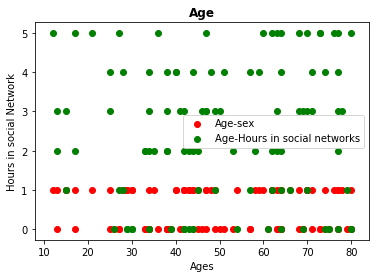

In [37]:
fig, ax = plt.subplots()


plt.scatter(df['Age'], df['Sex'], color='r', label='Age-sex')
plt.scatter(df['Age'], df['SN'], color='g',label='Age-Hours in social networks')

plt.legend(loc='best')

plt.ylabel('Hours in social Network')
plt.xlabel('Ages')

  
plt.title('Age', fontweight='bold')
plt.show()

In [14]:
df.columns

Index(['Age', 'Hours in bus', 'Hours in SN', 'Income'], dtype='object')

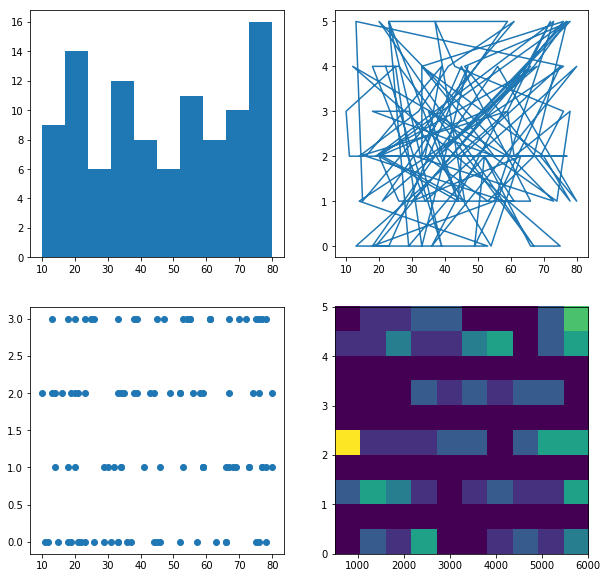

In [48]:


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df['Age'])
axs[1, 0].scatter(df['Age'],df['Hours in bus'])
axs[0, 1].plot(df['Age'], df['Hours in SN'])
axs[1, 1].hist2d(df['Income'], df['Hours in SN'])

plt.show()


In [51]:
df2=pd.read_csv("train.csv")
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df2=df2.drop(['Name','Ticket', 'Cabin', 'Embarked'],axis=1)
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [57]:
for i in range(len(df2)):
    if(df2['Sex'][i]=='male'):
        df2['Sex'][i]=0
    else:
        df2['Sex'][i]=1
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [68]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [69]:
mean_value=df2['Age'].mean()
df2['Age']=df2['Age'].fillna(mean_value)
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [71]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

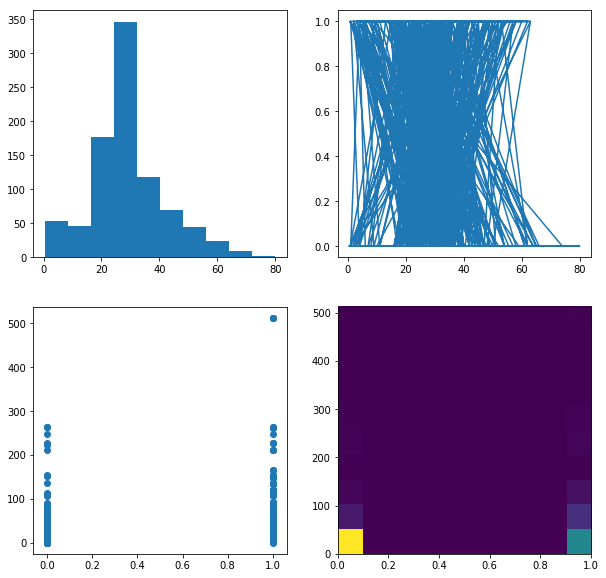

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df2['Age'])
axs[1, 0].scatter(df2['Age'],df2['Fare'])
axs[0, 1].plot(df2['Age'], df2['Sex'])
axs[1, 1].hist2d(df2['Sex'], df2['Survived'])

plt.show()

In [81]:
df=df2

In [100]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0332065,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0698085,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.331339,0.0830814,0.0184427,-0.5495
Age,0.0332065,-0.0698085,-0.331339,1,-0.232625,-0.179191,0.0915661
SibSp,-0.0575268,-0.0353225,0.0830814,-0.232625,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.179191,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0915661,0.159651,0.216225,1


PassengerId     
Sex                0    1
Survived                 
0                468   81
1                109  233

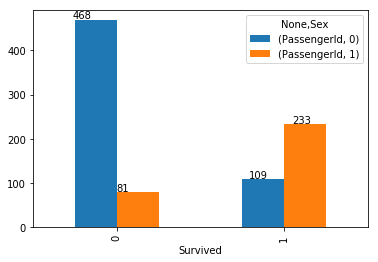

In [86]:
def make_pivot (param1, param2):
    df_slice = df[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart
make_pivot ('Survived','Sex')
# Sex 0 is male and 1 female
# Survived 1 is alive, 0 is dead

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

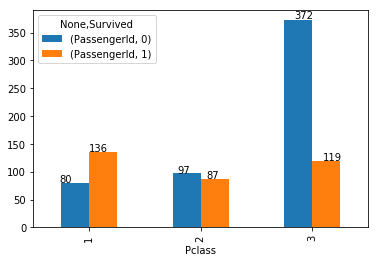

In [89]:
make_pivot ('Pclass','Survived')
# Sex 0 is male and 1 female
# Survived 1 is alive, 0 is dead

PassengerId     
Survived           0    1
Sex                      
0                468  109
1                 81  233

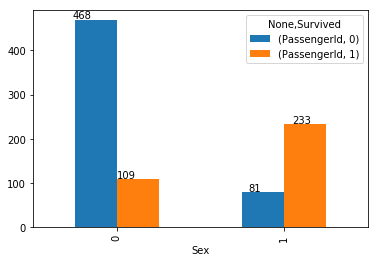

In [129]:
make_pivot ('Sex','Survived')

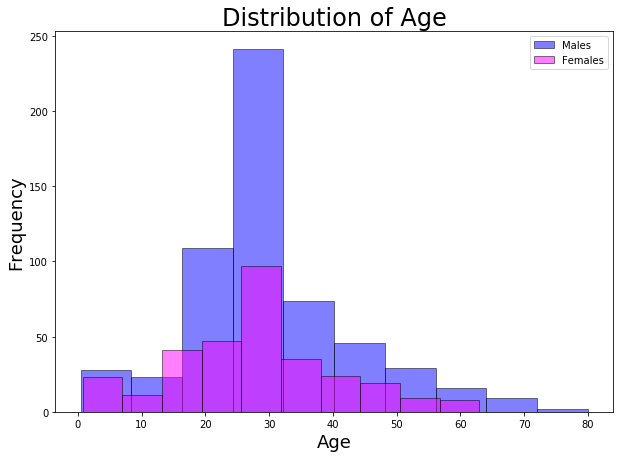

In [110]:
df[df['Sex']==0].Age.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Sex']==1].Age.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Age', size=24)
plt.xlabel('Age', size=18)
plt.ylabel('Frequency', size=18);

In [154]:
data_set=pd.read_csv("train.csv")
numeric_data = data_set.iloc[:,[0,1,5,9]]
numeric_data.head(3)

,PassengerId,Survived,Age,Fare
0,1,0,22.0,7.2500
1,2,1,38.0,71.2833
2,3,1,26.0,7.9250


In [153]:
category_data=data_set.iloc[:,[2,3,4,8,10,11]]
category_data.head()

,Pclass,Name,Sex,Ticket,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,3,"Allen, Mr. William Henry",male,373450,NaN,S


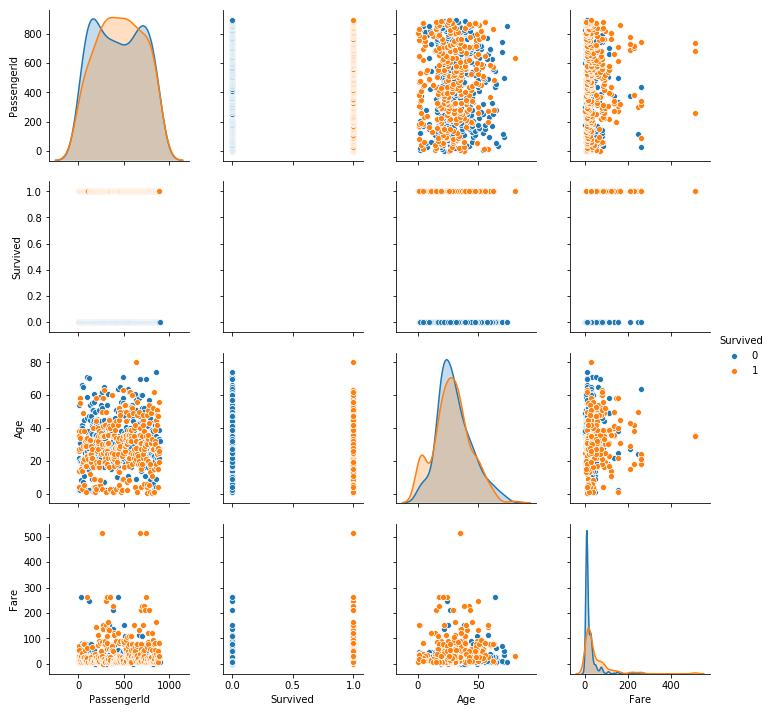

In [155]:
sns.pairplot(numeric_data.dropna(), hue='Survived')


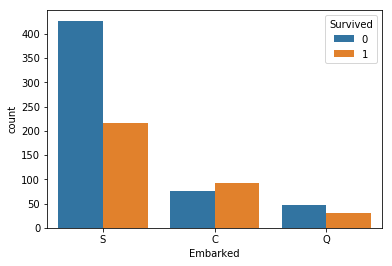

In [156]:
sns.countplot(data=data_set, x="Embarked", hue='Survived')

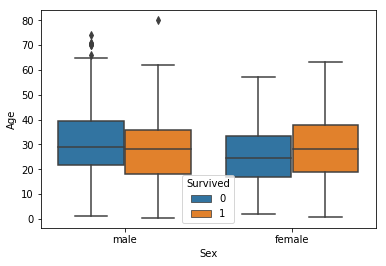

In [160]:
sns.boxplot(data=data_set, x='Sex', y='Age', hue ='Survived')

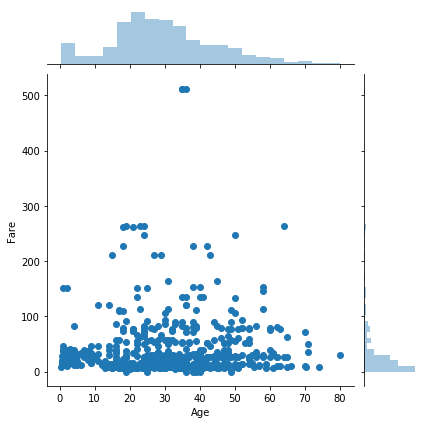

In [166]:
sns.jointplot(x= 'Age',y='Fare', data= data_set)